In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [3]:
data = datasets.fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

<class 'pandas.core.frame.DataFrame'>
(70000, 784)


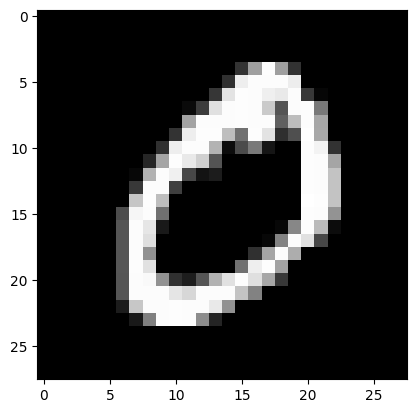

In [7]:
print(type(pixel_values))
print(pixel_values.shape)

single_image = pixel_values.iloc[1, :].values.reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [9]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values.iloc[:3000, :])

In [10]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=["x", "y", "targets"]
)
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

In [11]:
tsne_df.head(10)

,x,y,targets
0,20.084242,-13.257226,5.0
1,58.463333,2.007802,0.0
2,-2.381441,-54.136307,4.0
3,-41.306580,13.071194,1.0
4,-11.344637,-32.133461,9.0
5,0.216562,23.716993,2.0
6,-18.889906,48.240749,1.0
7,12.298749,7.646185,3.0
8,-20.482241,43.076591,1.0
9,-15.437369,-14.583488,4.0


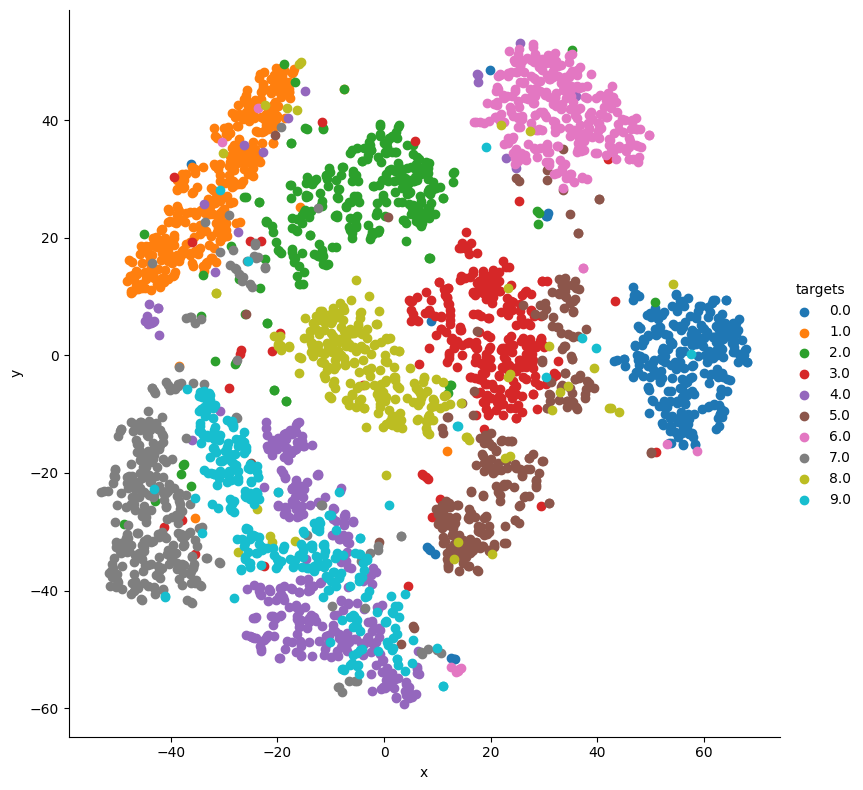

In [13]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
grid.map(plt.scatter, "x", "y").add_legend()